In [10]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
colors = {"tblis" : "olive", "gsl" : "green", "blas" : "red", "taco" : "blue", "gsl_tensor" : "cyan", \
          "dot_blas" : "gold", "dot_gsl" : "grey", "gemv_blas" : "purple", "gemv_gsl" : "pink", "mkl" :"black", "cuda":"green",\
         "dot_mkl" : "silver", "gemv_mkl" : "yellow"}

In [13]:
def save_plots_seperate(name, directory, systems, expr, interval, start, split, result_dir=""):
    
    result = None
    
    for system in systems:
        data = json.load(open(f'{directory}/{name}/{result_dir}/{system}'))
        df = pd.DataFrame(data["benchmarks"])
        df = df[df['aggregate_name'] == "median"]['real_time']
        df = df.reset_index(drop=True)
        df = df.rename_axis('dimension').reset_index()
        df['dimension'] = df['dimension']*interval + start
        
        df.rename(columns = {'real_time': f'{system}_real_time'}, inplace = True)
        
        if result is None:
            result = df
        else:
            result = pd.merge(result, df, on='dimension', how='outer')
        
        
    full_plt = result.plot(kind = 'line', x = 'dimension', y = [f'{i}_real_time' for i in systems],  color=[colors[system] for system in systems], title=expr)

    plt.ylabel('Real Time (ms)')
    plt.xlabel('Dimension')
    
    plt.savefig(f'{directory}/{name}/{result_dir}/raw_graph.png')

    f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
    result.plot(kind = 'line', x = 'dimension', y = [f'{i}_real_time' for i in systems], color=[colors[system] for system in systems], ax=ax)
    result.plot(kind = 'line', x = 'dimension', y = [f'{i}_real_time' for i in systems], color=[colors[system] for system in systems], ax=ax2)    
    
    full_plt = result.plot(kind = 'line', x = 'dimension', y = [f'{i}_real_time' for i in systems],  color=[colors[system] for system in systems], title=expr)
    
    plt.yscale("log")
    plt.ylabel('Real Time (ms)')
    plt.xlabel('Dimension')
    
    plt.savefig(f'{directory}/{name}/{result_dir}/log_graph.png')
    
    

In [14]:
def save_plots_seperate_sparsity(name, directory, systems, expr, split, sparse, result_dir=""):
    
    result = None
    
    for system in systems:
        data = json.load(open(f'{directory}/{name}/{result_dir}/{system}'))
        df = pd.DataFrame(data["benchmarks"])
        df = df.reset_index(drop=True)
        df = df.rename_axis('sparisty').reset_index()
        df.rename(columns = {'real_time': f'{system}_real_time'}, inplace = True)
        
        if result is None:
            result = df
        else:
            result = pd.merge(result, df, on='sparisty', how='outer')
        
    
    sparse = [str(i) for i in sparse]
    result['sparisty'] = sparse
    full_plt = result.plot(kind = 'line', x = 'sparisty', y = [f'{i}_real_time' for i in systems],  color=[colors[system] for system in systems], title=expr)

    plt.ylabel('Real Time (ms)')
    plt.xlabel('sparisty')
    
    plt.savefig(f'{directory}/{name}/{result_dir}/raw_graph.png')

    f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
    result.plot(kind = 'line', x = 'sparisty', y = [f'{i}_real_time' for i in systems], color=[colors[system] for system in systems], ax=ax)
    result.plot(kind = 'line', x = 'sparisty', y = [f'{i}_real_time' for i in systems], color=[colors[system] for system in systems], ax=ax2)
    
    maximum = max([result[f'{i}_real_time'].max() for i in systems])
    
    
    ax2.set_ylim(0, split) 
    ax.set_ylim(split, maximum)
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.xaxis.tick_top()
    ax.tick_params(labeltop=False)  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()
    
    f.suptitle(expr)
    plt.ylabel('Real Time (ms)')
    plt.xlabel('sparisty')
        
    plt.savefig(f'{directory}/{name}/{result_dir}/split_graph.png')
    
    
    full_plt = result.plot(kind = 'line', x = 'sparisty', y = [f'{i}_real_time' for i in systems],  color=[colors[system] for system in systems], title=expr)
    
    plt.yscale("log")
    plt.ylabel('Real Time (ms)')
    plt.xlabel('sparisty')
    
    plt.savefig(f'{directory}/{name}/{result_dir}/log_graph.png')

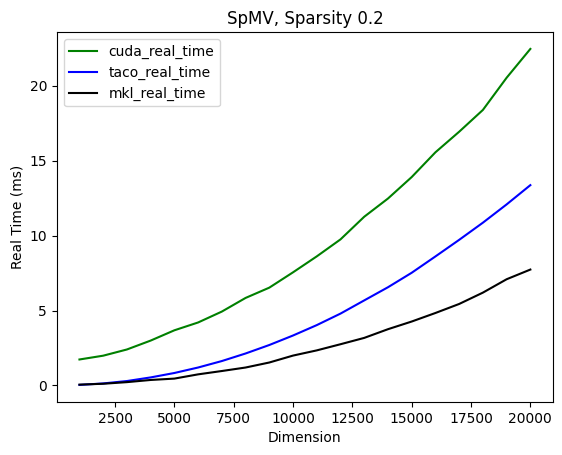

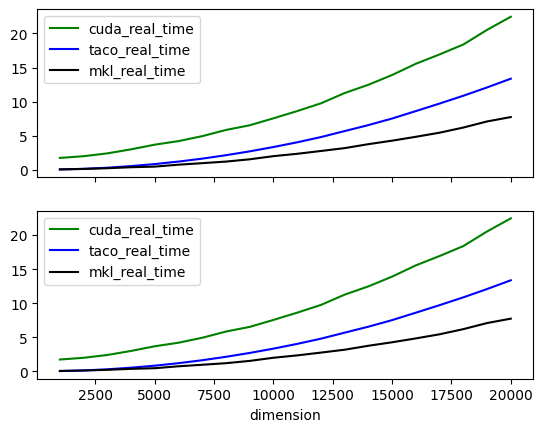

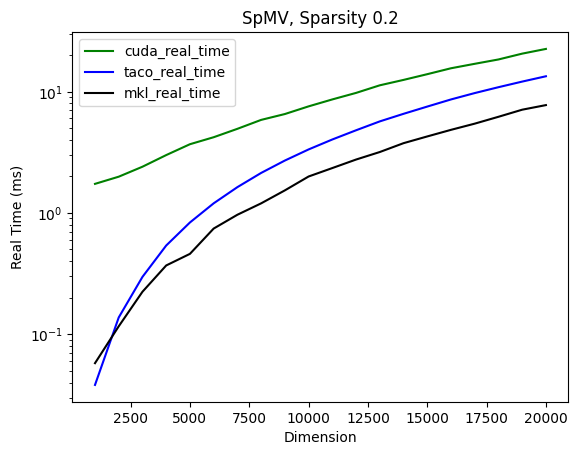

In [16]:
save_plots_seperate("spmv", "./", \
                     ["cuda", "taco", "mkl"],\
                     "SpMV, Sparsity 0.2", 1000, 1000, 0.5)

/var/folders/fj/cgymk3ms6_d0fx9x0krbhsw80000gn/T/ipykernel_36049/160361489.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'run_type_x', 'per_family_instance_index_x', 'run_name_x', 'family_index_x', 'cpu_time_x', 'repetitions_x', 'repetition_index_x', 'name_x', 'threads_x', 'time_unit_x', 'iterations_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = pd.merge(result, df, on='sparisty', how='outer')
/var/folders/fj/cgymk3ms6_d0fx9x0krbhsw80000gn/T/ipykernel_36049/160361489.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'run_type_x', 'per_family_instance_index_x', 'run_name_x', 'family_index_x', 'cpu_time_x', 'repetitions_x', 'repetition_index_x', 'name_x', 'threads_x', 'time_unit_x', 'iterations_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = pd.merge(result, df, on='sparisty', how='outer')


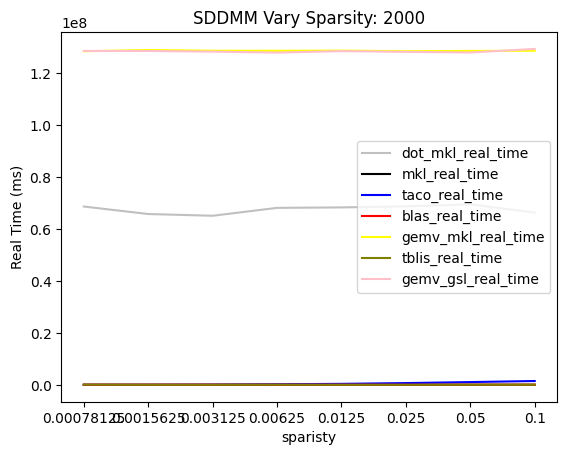

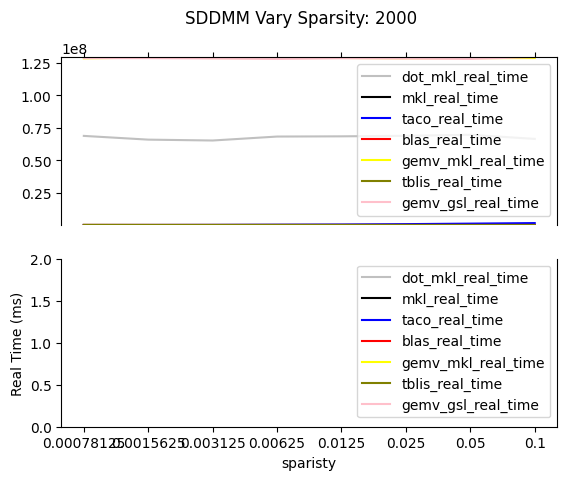

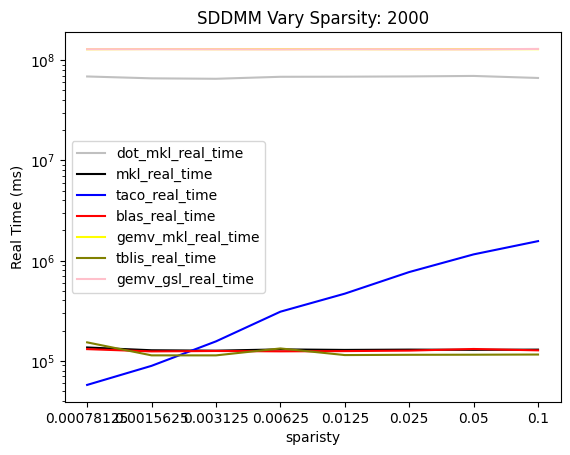

In [18]:
save_plots_seperate_sparsity("sddmm_varSparsity", "./", \
                             ["dot_mkl", "mkl","taco", "blas", "gemv_mkl", "tblis", "gemv_gsl"], \
                             "SDDMM Vary Sparsity: 2000", 2,  [0.00078125, 0.0015625, 0.003125, 0.00625, 0.0125, 0.025, 0.05, 0.1])

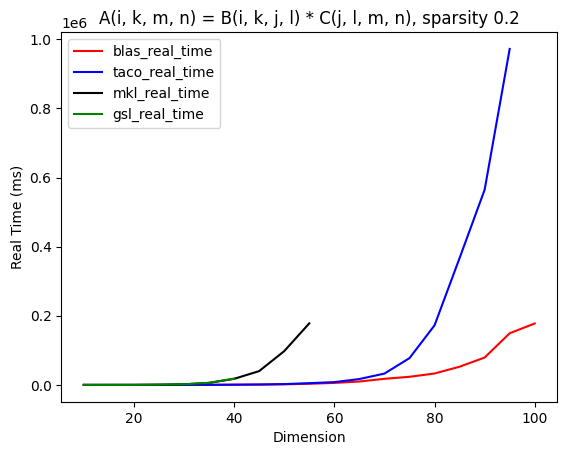

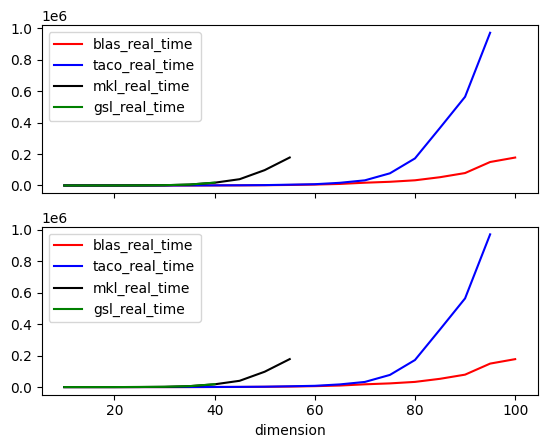

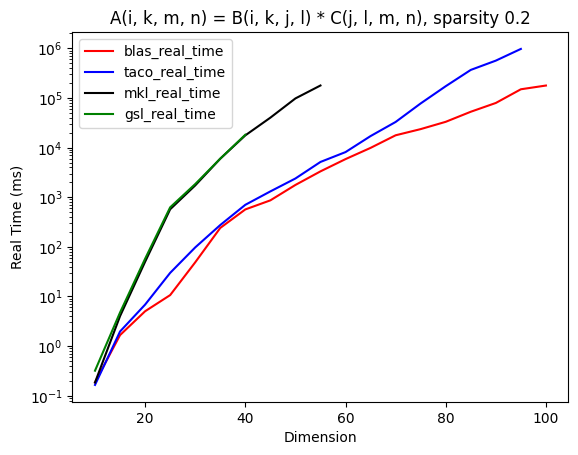

In [23]:
save_plots_seperate("blockedSparse_4T", "./", ["blas", "taco"],\
                    "A(i, k, m, n) = B(i, k, j, l) * C(j, l, m, n), sparsity 0.2", 5, 10, 0.5)